# Day or Night Classifier

The purpose of the project is to brush OpenCV basics in order to classify whether the given image is day or night. For the same purpose, we will be revising concepts of masking, threshold, change in intensity and finally writing a simple conditional classifier.

# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


In [1]:
import cv2 # computer vision library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
#Lets load the dataset
image_dir_training = "./day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [3]:
print(image_dir_training)

./day_night_images/training/


## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 


In [7]:
import os
import glob
def dataloader(img):
    im_list=[]
    image_types = ["day", "night"]
    for i in image_types:
        for file in glob.glob(os.path.join(img, i, "*")):
            # print(file)
            im = mpimg.imread(file)
            if not im is None:
                im_list.append((im, i))
    
    return im_list
Image_list=dataloader(image_dir_training)
len(Image_list)


240

# Visualizing the images 

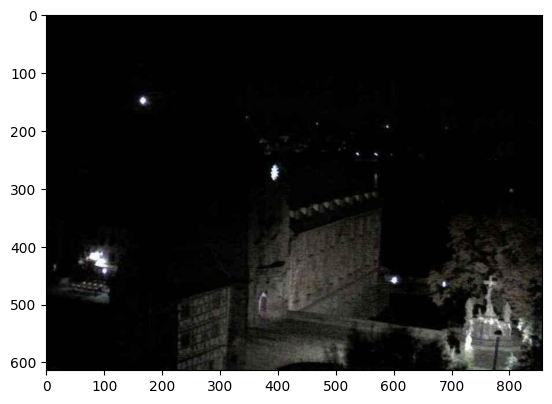

In [14]:
plt.imshow(Image_list[0][0])
plt.imshow(Image_list[140][0])

# Pre-process the Data

After loading in each image, you have to standardize the input and output. 
---
### Input

It's important to make all your images the same size so that they can be sent through the same pipeline of classification steps! Every input image should be in the same format, of the same size, and so on.

#### TODO: Standardize the input images

* Resize each image to the desired input size: 600x1100px (hxw).

In [15]:
def standard_input(image):
    
    standard_im = []        
    standard_im=image[0:600, 0:1100]
    
    return standard_im